In [6]:
import os
import json
from collections import Counter
from collections import OrderedDict
#打開檔案

wc = Counter()              # local variable 'wc' referenced before assignment  要注意區域變數問題！！！  不能放在迴圈
wc["C"] = 0                 # 自行建立字典過濾非必要的單字
wc["C++"] = 0
wc["C#"] = 0
wc["PYTHON"] = 0
wc["JAVA"] = 0
wc["JAVASCRIPT"] = 0
wc["PHP"] = 0
wc["HTML"] = 0
wc["SQL"] = 0
wc["CSS"] = 0
wc["R"] = 0
wc["CSS"] = 0
wc["BASH"] = 0
wc["RUBY"] = 0
wc["PERL"] = 0
wc["SCALA"] = 0
wc["SWIFT"] = 0
wc["GO"] = 0
wc["DELPHI"] = 0
wc["TYPESCRIPT"] = 0
wc["JQUERY"] = 0


os.chdir("~/Mycode/123/data")         # 切換路徑
retval = os.getcwd()            # 更改當前目錄
files = os.listdir(retval)      # 當前目錄下檔案
print(retval)
for file in files:                   # 把資料夾(files)內的多檔案取出 裝進list裡(file)
    with open(file, 'r') as f:       # 把檔案讀出打開
        data = json.loads(f.read())  # json 格式打開
        # print(data)
        for lang in data:            # 再把 data 丟入
            wc[lang] += data[lang]   # 把 data 數量從 wc內 0 開始相加
#print(wc.most_common())             # 印出按照高低排序

lang = OrderedDict(wc.most_common())
with open('json_all2.json', 'w') as fu:   # 寫入json檔案
    json.dump(lang, fu)                  # json 特有
    fu.closed
print(wc.most_common())

#==========================================================================


FileNotFoundError: [Errno 2] No such file or directory: '~/Mycode/123/data'

In [ ]:
• kind（作圖種類）
‣ ‘line’ : line plot (default) （折線圖）
‣ ‘bar’ : vertical bar plot （垂直長條圖）
‣ ‘barh’ : horizontal bar plot （⽔平長條圖）
‣ ‘hist’ : histogram （直⽅圖）
‣ ‘box’ : boxplot（箱型圖）
‣ ‘kde’ : Kernel Density Estimation plot （機率密度圖）
‣ ‘density’ : same as ‘kde’ （機率密度圖）
‣ ‘area’ : area plot （⾯積圖）
‣ ‘pie’ : pie plot （圓餅圖）
‣ ‘scatter’ : scatter plot（散佈圖）
‣ ‘hexbin’ : hexbin plot（蜂窩圖）

DataFrame.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None,
figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, xticks=None, yticks=None,
fontsize=None, sort_columns=False) 

‣ 作圖參數說明與功能
• subplot（每⼀欄都作出⼀張⼦圖）：True/False
• sharex（共⽤x軸）：True/False
• sharey（共⽤y軸）：True/False
• figsize（作圖尺⼨）：(width, height)
• title（標題）：string
• grid（格線）：True/False
• legend（圖例）：True/False
• style（風格）：list or dict（每⼀欄的作圖風格）
• xticks（x刻度）：list
• yticks（y刻度）：list
• fontsize（字體⼤⼩）：int
• stacked（堆疊）：True/False
• sort_columns（依照column名稱排序作圖）：True/False



[[   0   25   25   47   68   69   91  121  135  156  228  455  804  894
  1759 1952 2083 2145 2225 3004 3018 3415 3638]]
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)


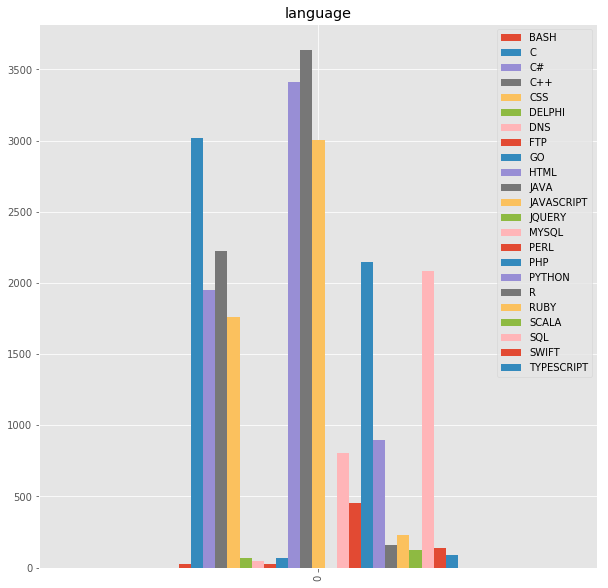

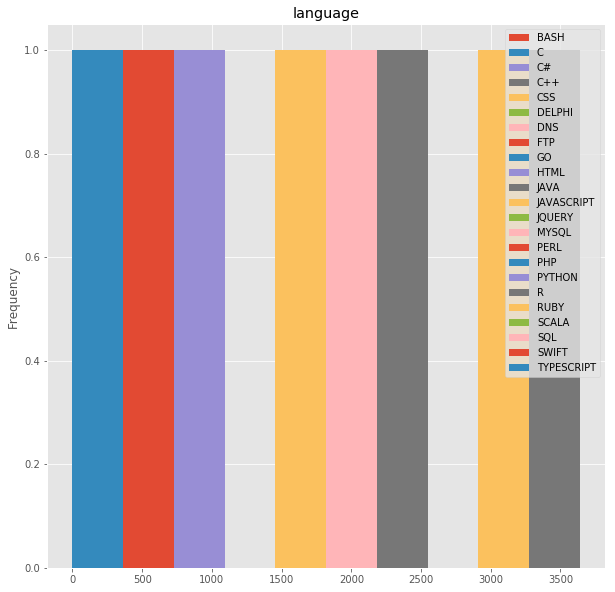

In [2]:
import pandas as pd
import pandas
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import json
import os

plt.style.use('ggplot')
%matplotlib inline
dicList=[json.loads(line) for line in open('json_all2.json')]    # 將json檔取出並用 loads 取出值在丟入list
#df = pd.DataFrame.from_dict(dicList).stack()                    # 轉換成 datafram(二維陣列) 將列轉成行
df = pd.DataFrame.from_dict(dicList)
dd = np.sort(df)
print(dd)
#print(df)
bar=df.plot(kind ="bar",title = 'language',figsize = (10,10))
print(bar)
#df.describe()  # 統計摘要


bar=df.plot(kind ="hist",title = 'language',figsize = (10,10))
print(bar)







#df.head()

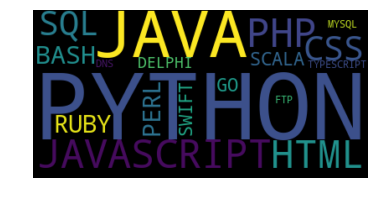

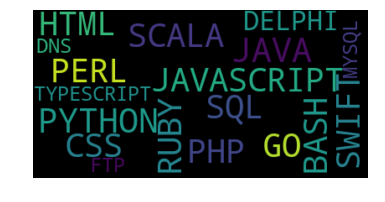

In [1]:
#####文字雲####
#from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#d = path.dirname(__file__)

# Read the whole text.
#text = open(path.join(d, 'json.txt')).read()
text = open("json.txt","r").read()
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

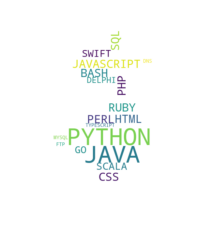

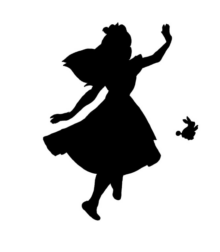

In [43]:
####Alice##
"""
Masked wordcloud
================
Using a mask you can generate wordclouds in arbitrary shapes.
"""

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

d = path.dirname("alice_mask.png")   # 代入你要的圖案

# Read the whole text.
#text = open(path.join(d, 'alice.txt')).read()
text = open("json.txt","r").read()   # 打開你整理好的data
# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "alice_mask.png"))) 

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=5000, mask=alice_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
df.plot(kind ="bar",title = 'langule',figsize = (6,4))

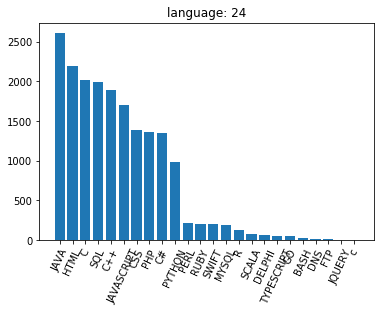

In [57]:
import numpy as np
import matplotlib.pyplot as plt

xticks = np.arange(len(lang))
plt.xticks(xticks, list(lang.keys()))  # 預設 X 座標數字，改顯示水果名
plt.bar(xticks,lang.values(),align = 'center')
plt.xticks(rotation = 65)                  #選轉角度
plt.title("language: %d" % len(lang))  # 給標題
plt.show()